#### Comparison of proportion of cigarette smokers vs household expenditure on tobacco

In [4]:
import pandas as pd
#importing cleaned NHS datasets
affordability = pd.read_csv("NHS_smoking_eng_2020/Table_S.3.1-Table_1_cleaned.csv")
expenditure = pd.read_csv("NHS_smoking_eng_2020/Table_S.3.2-Table_1_cleaned.csv")
#importing ONS dataset that Bonnie has cleaned
smoking_habits = pd.read_csv("ONS_adult_smoking_habits_in_great_britain/Table_1a-Table_1_cleaned.csv")


In [9]:
#Getting relevant columns for visualisation
adults=smoking_habits[['Year', 'All 16+']]
#Reversing the columns so that both datasets match
adults_reversed = adults.iloc[::-1]
adults_reversed
#Further qualifying the data so only data from the years 2000 is selected
adults_2000 = adults_reversed.iloc[13:33]
adults_2000['All 16+']

22    27.0
21    26.9
20    25.9
19    26.0
18    24.6
17    23.9
16    22.0
15    20.9
14    21.1
13    21.0
12    20.3
11    19.8
10    20.4
9     19.2
8     18.8
7     17.8
6     16.1
5     16.8
4     16.6
3     15.8
Name: All 16+, dtype: float64

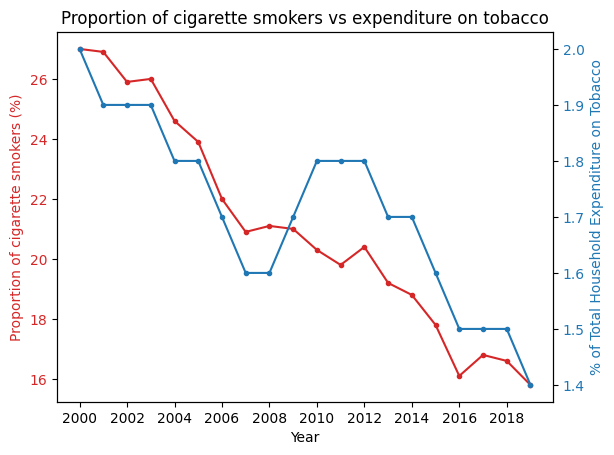

In [16]:
import matplotlib.pyplot as plt

#Getting expenditure data from the year 2000 onwards
expenditure_2000=expenditure.iloc[13:, 4]

#Getting the year data from 2000 onwards
year = expenditure.iloc[13:, 1]

#Creating my visualisation

#X axis and first y axis
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel("Year")
ax1.set_ylabel("Proportion of cigarette smokers (%)", color=color)
ax1.plot(year, adults_2000['All 16+'], color=color, marker='o', markersize=3)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks([2000,2002,2004,2006,2008,2010,2012, 2014, 2016, 2018])
plt.title("Proportion of cigarette smokers vs expenditure on tobacco")

#Create a second y axis that shares the same x axis
ax2 = ax1.twinx()  

#Plot the second y axis
color = 'tab:blue'
ax2.set_ylabel("% of Total Household Expenditure on Tobacco", color=color)  
ax2.plot(year, expenditure_2000, color=color, marker='o', markersize=3)
ax2.tick_params(axis='y', labelcolor=color)


plt.show()

The proportion of cigarette users seems to have a relatively steady decline, while the expenditure on tobacco appears to be more affected by external factors. Of note is the sharp rise in expenditure from 2008 to 2010, before it begins to fall again from 2012. The most obvious external factor that could affect the UK in 2008 is the recession. This may suggest that those that currently smoked would have an increased tobacco usage during times of stress.

#### Comparison of ecigarette and tobacco use from 2014 to 2022

In [60]:
#Extracting ONS data on ecig use that has been cleaned by Bonnie

ecig_habits = pd.read_csv("ONS_ecigarette_use_in_great_britain/table1abc_cleaned.csv")
ecig_habits
ecigs_adults = ecig_habits["All 16+"] 

#Extracting data on tobacco use from 2014 onwards for a direct comparison with the more limited ecigarette usage dataset
cigs_adults = smoking_habits['All 16+']
cigs_2014 = cigs_adults[:9]
cigs_2014

0    11.2
1    12.7
2    14.5
3    15.8
4    16.6
5    16.8
6    16.1
7    17.8
8    18.8
Name: All 16+, dtype: float64

In [61]:
#First lets look at the correlation coefficent

import numpy as np

#Choose the columns I want to compare and convert them into a numby array

afford_array = np.array(ecigs_adults)
tobacco_array = np.array(cigs_2014)

#
tobacco_coeff = np.corrcoef(afford_array, tobacco_array)

#print the correlation coefficient
tobacco_coeff

array([[ 1.        , -0.96845349],
       [-0.96845349,  1.        ]])

There's a very strong negative correlation between ecigarette use and tobacco use.

Text(0.5, 1.0, 'Relationship between Cigarette and Ecigarette Usage')

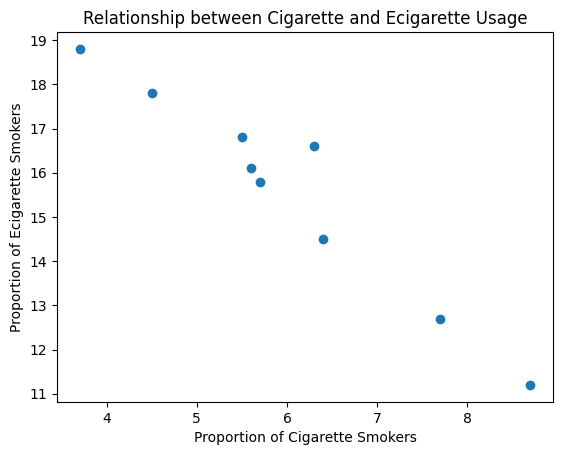

In [62]:
#Plot it on a scatter graph
plt.scatter(x=ecigs_adults, y=cigs_2014)
plt.xlabel("Proportion of Cigarette Smokers")
plt.ylabel("Proportion of Ecigarette Smokers")
plt.title("Relationship between Cigarette and Ecigarette Usage")

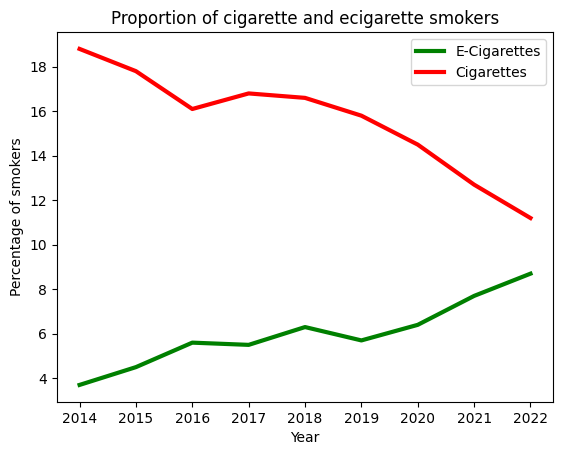

In [63]:
#Plot on a line graph
year1 = ecig_habits["Year"] 

plt.plot(year1, ecigs_adults, 'g', label='E-Cigarettes', linewidth=3)
plt.plot(year1, cigs_2014, 'r', label='Cigarettes', linewidth=3)

plt.xlabel("Year")
plt.ylabel("Percentage of smokers")
plt.title("Proportion of cigarette and ecigarette smokers")

plt.legend()
plt.show()

There is definitely a nice negative correlation between cigarette and e-cigarette usage. However, we do not have data regarding the proportion of e-cigarette users who used to be tobacco cigarette smokers, or the percentage of people who use both cigarettes and e-cigarettes. We cannot determine causation.

Bonnie found that the 16-24 age range had the highest rise in e-cigarette users in recent years, though potentially skewed data due to changes in survey questions

Lets do a quick visual to compare the 16-24 group to the 16+ group, and see if there is a correspondingly higher drop in tobacco usage for the youngest age group

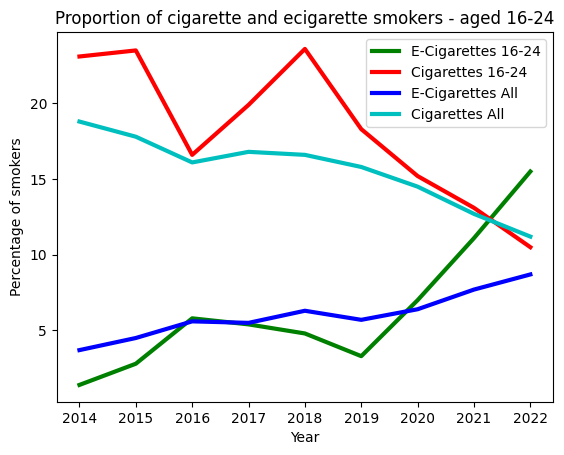

In [65]:


youth_ecig = ecig_habits['All 16-24']
youth_cig = smoking_habits['All 16-24']
tobacco_2014a = youth_cig[:9]

plt.plot(year1, youth_ecig, 'g', label='E-Cigarettes 16-24', linewidth=3)
plt.plot(year1, tobacco_2014a, 'r', label='Cigarettes 16-24', linewidth=3)
plt.plot(year1, ecigs_adults, 'b', label='E-Cigarettes All', linewidth=3)
plt.plot(year1, cigs_2014, 'c', label='Cigarettes All', linewidth=3)

plt.xlabel("Year")
plt.ylabel("Percentage of smokers")
plt.title("Proportion of cigarette and ecigarette smokers - aged 16-24")

plt.legend()
plt.show()

At a quick glance, the proportion of cigarette smokers in both the 16-24 and 16+ age groups has been dropping at a similar rate since 2019 - in contrast to the proportionally higher rise in e-cigarette users in the 16-24 age range. This may suggest that young people aren't using e-cigarettes as a tool to quit smoking, but potentially young people who didn't previously smoke take up smoking e-cigarettes as an alternative to tobacco.

In general, it seems that we are limited in our analysis by the recency of the e-cigarette data. As it only goes back to 2014, it is harder to determine trends in relation to the proportion of smokers as a whole.